In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
a=pd.read_csv("multiTimeline.csv",skiprows=1)
a.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [5]:
a.columns=['month','diet','gym','finance']

In [6]:
a.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [7]:
a.month = pd.to_datetime(a.month)
a.set_index('month', inplace=True)

In [8]:
a.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


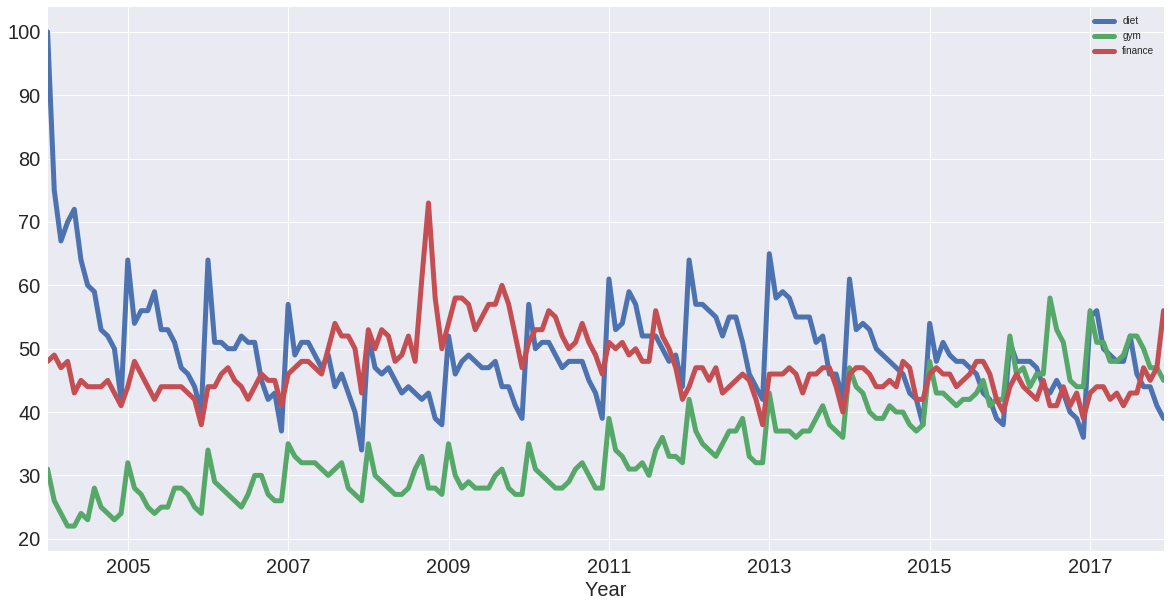

In [9]:
a.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Identifying Trend with Rolling Average

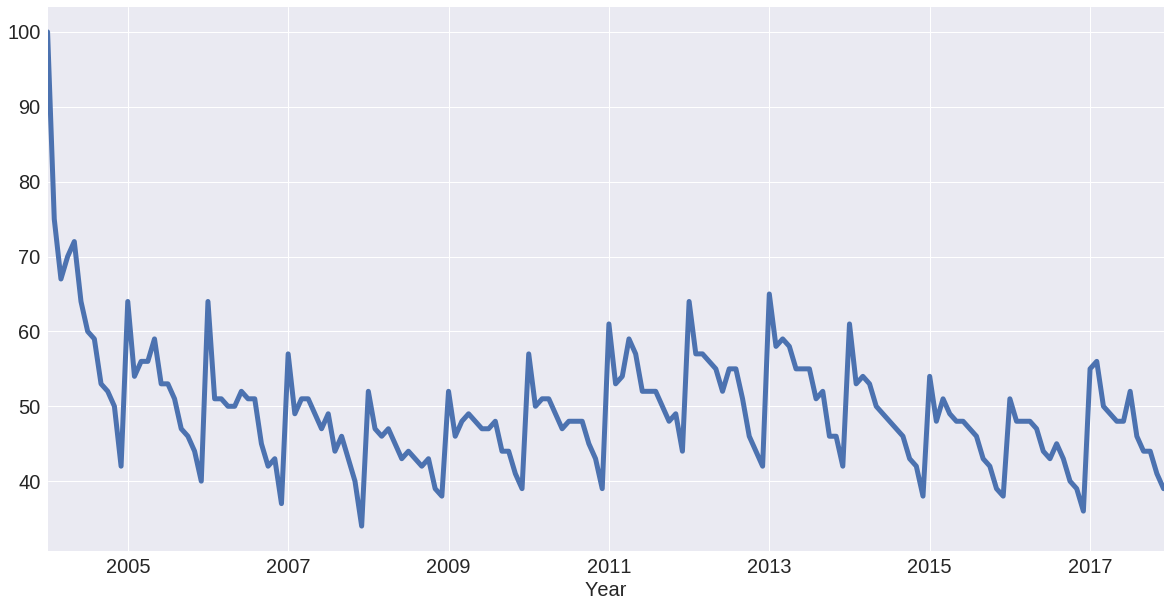

In [38]:
a['diet'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

**While looking the above graph, we can't see the yearly trend, distracted by monthly seasonality. Hence we have to remove the seasonality by Rolling Average to find the trend.**

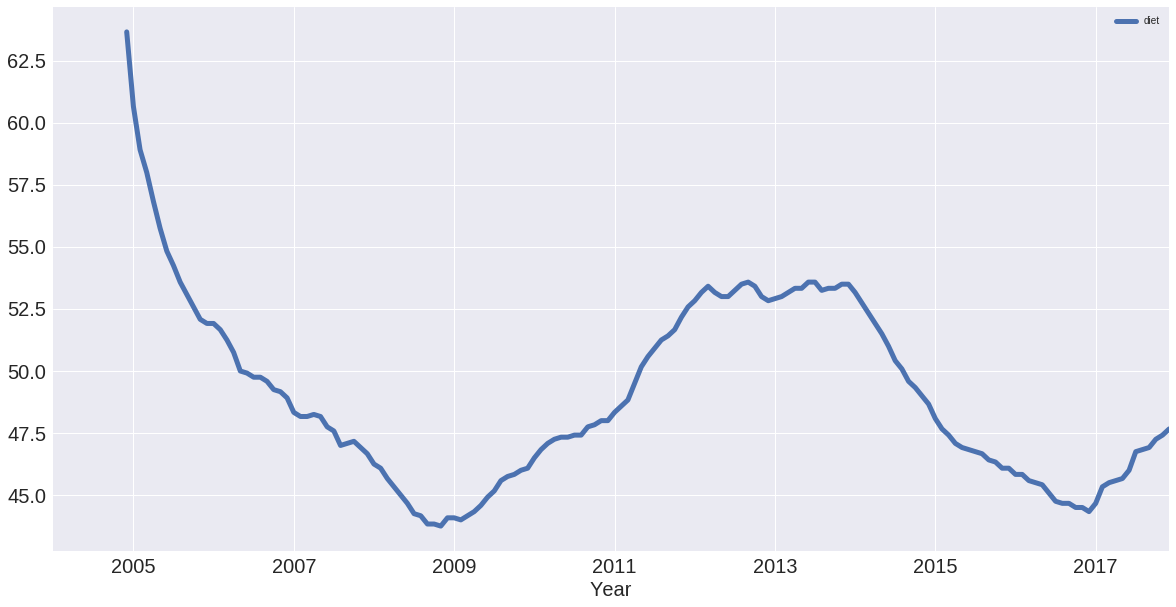

In [33]:
a[['diet']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

** This Rolling Average shows us the trend lies on the data.**

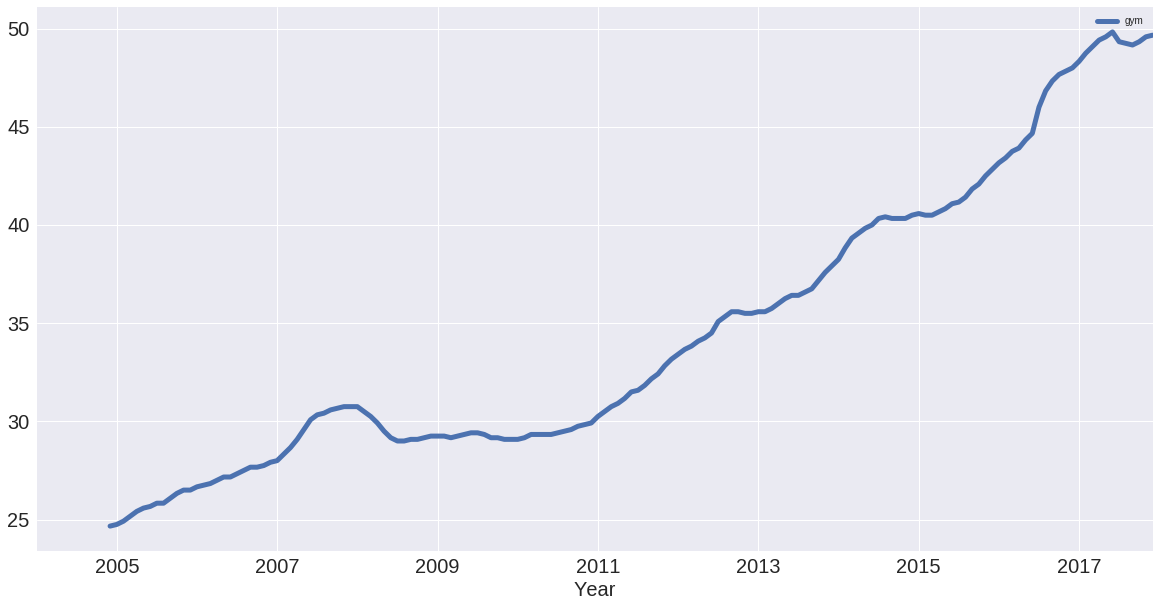

In [23]:
a[['gym']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

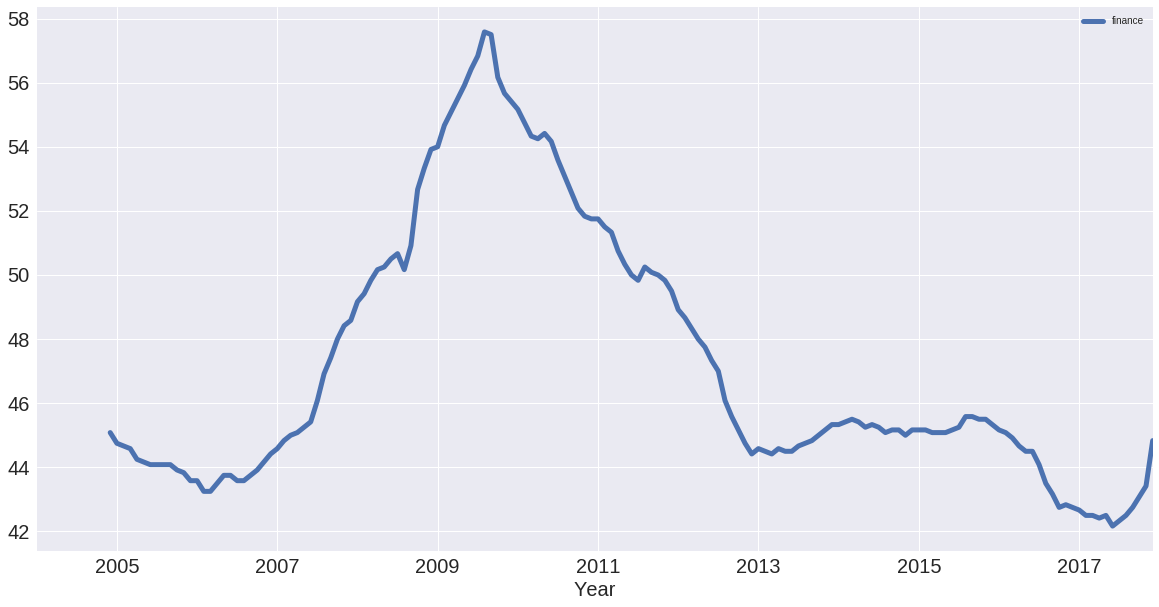

In [39]:
a[['finance']].rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

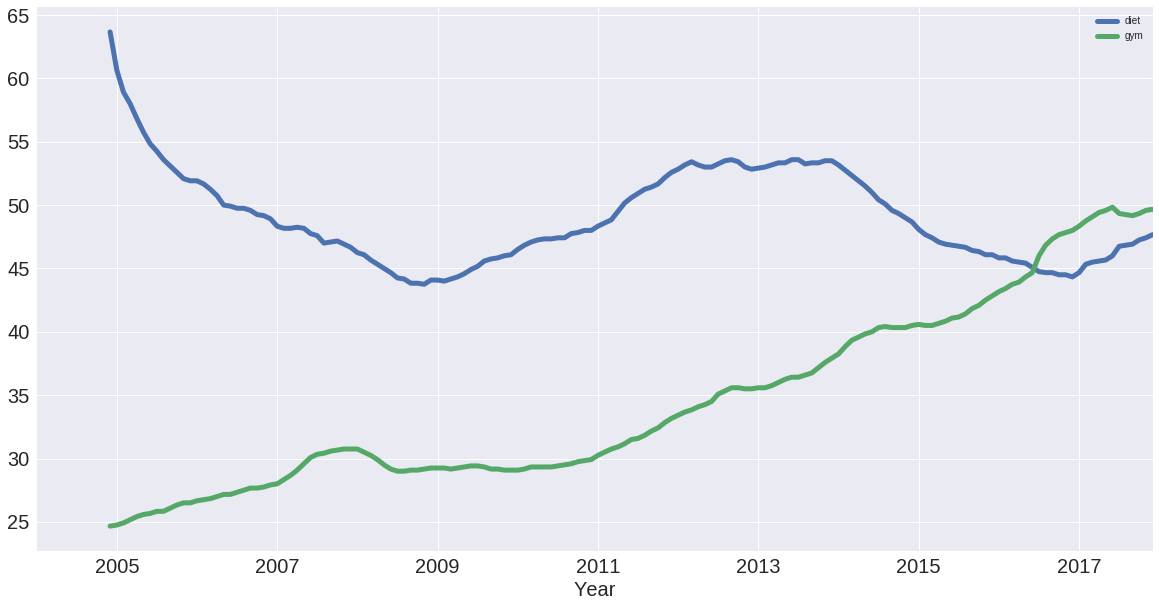

In [24]:
a_rm = pd.concat([a[['diet']].rolling(12).mean(), a[['gym']].rolling(12).mean()], axis=1)
a_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Identifying Seasonality with diff()

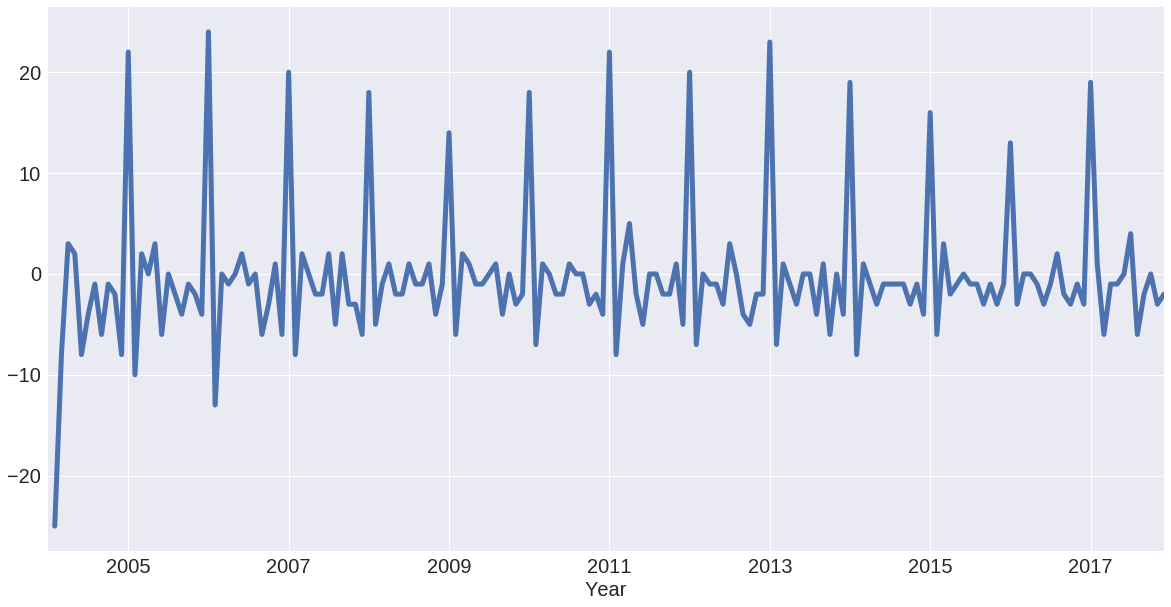

In [25]:
a['diet'].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

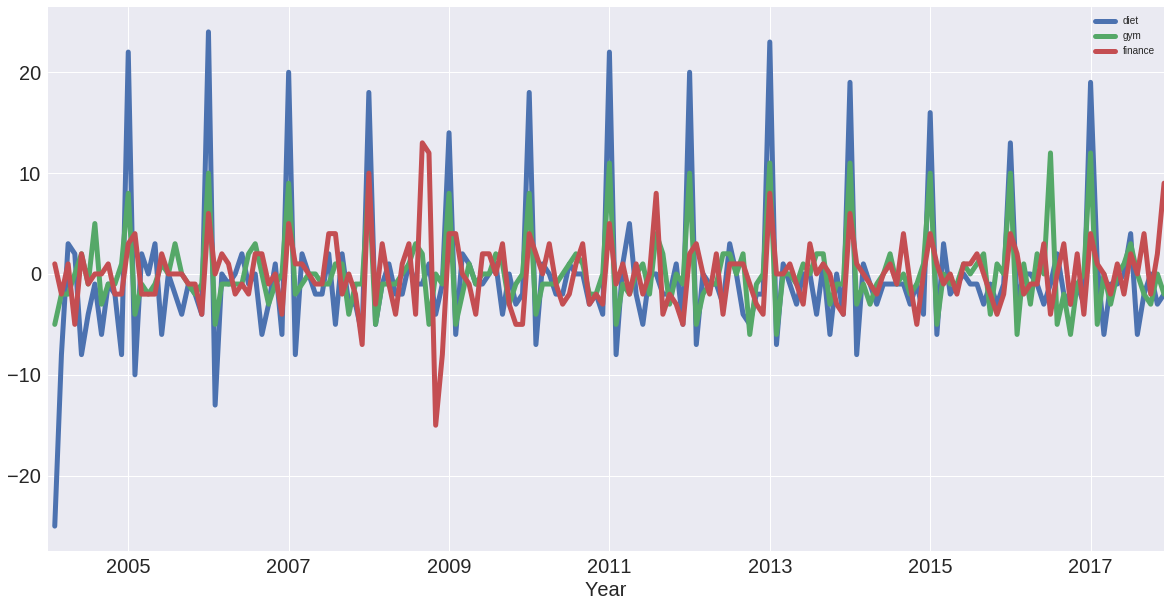

In [40]:
a.diff(periods=1).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

** While seeing the above graph we can see that the columns gym,diet and finance are highly correlated when plotted with diff()**

# Correlation

In [37]:
a.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


In [47]:
a.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


diet       2.132535
gym        2.059818
finance    1.674939
dtype: float64

diet       0.0
gym        0.0
finance    0.0
dtype: float64
diet       2.132535
gym        2.059818
finance    1.674939
dtype: float64
diet       2.012306
gym        1.956976
finance    1.543673
dtype: float64
diet       1.929984
gym        1.918734
finance    1.487282
dtype: float64
diet       1.843946
gym        1.779619
finance    1.413289
dtype: float64
diet       1.738911
gym        1.645082
finance    1.311233
dtype: float64
diet       1.694536
gym        1.558672
finance    1.220772
dtype: float64
diet       1.706825
gym        1.594606
finance    1.309378
dtype: float64
diet       1.773128
gym        1.707153
finance    1.361906
dtype: float64
diet       1.827455
gym        1.782047
finance    1.393109
dtype: float64
diet       1.844396
gym        1.753091
finance    1.375650
dtype: float64
diet       1.796282
gym        1.652701
finance    1.284080
dtype: float64
diet       0.997422
gym        0.798815
finance    0.745747
dtype: float64
diet       1.718398
gym        1.620336


In [48]:
almo=pd.read_excel("/home/mani/Learning/TimeSeries/AlmoSalesTemp.xlsx")

In [49]:
almo.head()

,Year-Month,Max of temp,Min of templow,Average of hum,Sales
0,2015-1,29,-3,69.042339,100
1,2015-10,38,10,66.135081,1708
2,2015-11,31,-2,62.456250,159
3,2015-12,28,-3,67.272177,150
4,2015-2,31,3,67.991071,217


In [50]:
almo.columns=['month','MaxTemp','MinTemp','Humidity','Sales']
almo.month = pd.to_datetime(almo.month)

In [51]:
almo.head()

,month,MaxTemp,MinTemp,Humidity,Sales
0,2015-01-01,29,-3,69.042339,100
1,2015-10-01,38,10,66.135081,1708
2,2015-11-01,31,-2,62.456250,159
3,2015-12-01,28,-3,67.272177,150
4,2015-02-01,31,3,67.991071,217


In [53]:
almo.set_index('month', inplace=True)

In [54]:
almo.head()

,MaxTemp,MinTemp,Humidity,Sales
month,,,,
2015-01-01,29,-3,69.042339,100
2015-10-01,38,10,66.135081,1708
2015-11-01,31,-2,62.456250,159
2015-12-01,28,-3,67.272177,150
2015-02-01,31,3,67.991071,217


In [56]:
almo.corr()

,MaxTemp,MinTemp,Humidity,Sales
MaxTemp,1.000000,0.897261,-0.538809,0.680488
MinTemp,0.897261,1.000000,-0.390894,0.642859
Humidity,-0.538809,-0.390894,1.000000,-0.272468
Sales,0.680488,0.642859,-0.272468,1.000000


In [58]:
for i in range(20):
    print(i)
    print(almo.diff(periods=i).corr())

0
          MaxTemp  MinTemp  Humidity  Sales
MaxTemp       NaN      NaN       NaN    NaN
MinTemp       NaN      NaN       NaN    NaN
Humidity      NaN      NaN       NaN    NaN
Sales         NaN      NaN       NaN    NaN
1
           MaxTemp   MinTemp  Humidity     Sales
MaxTemp   1.000000  0.779063 -0.603287  0.411242
MinTemp   0.779063  1.000000 -0.339833  0.293463
Humidity -0.603287 -0.339833  1.000000 -0.239212
Sales     0.411242  0.293463 -0.239212  1.000000
2
           MaxTemp   MinTemp  Humidity     Sales
MaxTemp   1.000000  0.866261 -0.528055  0.545315
MinTemp   0.866261  1.000000 -0.400771  0.462559
Humidity -0.528055 -0.400771  1.000000 -0.149056
Sales     0.545315  0.462559 -0.149056  1.000000
3
           MaxTemp   MinTemp  Humidity     Sales
MaxTemp   1.000000  0.878117 -0.564095  0.664017
MinTemp   0.878117  1.000000 -0.415422  0.671047
Humidity -0.564095 -0.415422  1.000000 -0.301705
Sales     0.664017  0.671047 -0.301705  1.000000
4
           MaxTemp   MinTemp  Humid

In [59]:
almo.diff(periods=8)

,MaxTemp,MinTemp,Humidity,Sales
month,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-10-01,NaN,NaN,NaN,NaN
2015-11-01,NaN,NaN,NaN,NaN
2015-12-01,NaN,NaN,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN
2015-03-01,NaN,NaN,NaN,NaN
2015-04-01,NaN,NaN,NaN,NaN
2015-05-01,NaN,NaN,NaN,NaN
2015-06-01,12.0,15.0,-4.246505,3675.0
